## Resources used:
https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/ <br>
https://towardsdatascience.com/stock-analysis-in-python-a0054e2c1a4c

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm


from pandas_datareader import data
from matplotlib.ticker import FuncFormatter
from pandas.plotting import scatter_matrix

# import seaborn as sns

# !pip install yfinance

# import yfinance as yf

%matplotlib inline

# yahoo finance API: 5 year data (open, high, low, close, volume)

## Load stock data for AAPL (10 years)

In [3]:
tickers = ['AAPL']

start_date = '2012-01-01'
end_date = '2022-01-01'

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [4]:
panel_data.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.575915,14.686786,14.732143,14.607143,14.621429,302220800.0
2012-01-04,12.643499,14.765714,14.810000,14.617143,14.642857,260022000.0
2012-01-05,12.783867,14.929643,14.948214,14.738214,14.819643,271269600.0
2012-01-06,12.917507,15.085714,15.098214,14.972143,14.991786,318292800.0
2012-01-09,12.897020,15.061786,15.276786,15.048214,15.196429,394024400.0


In [6]:
panel_data.shape

(2517, 6)

In [7]:
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2517 non-null   float64
 1   (Close, AAPL)      2517 non-null   float64
 2   (High, AAPL)       2517 non-null   float64
 3   (Low, AAPL)        2517 non-null   float64
 4   (Open, AAPL)       2517 non-null   float64
 5   (Volume, AAPL)     2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


### Review summary statistics of 'close_price' and 'adj_close_price' data 

In [8]:
close_price = panel_data['Close']
close_price.describe().round(1)

Symbols,AAPL
count,2517.0
mean,49.0
std,38.7
min,13.9
25%,23.7
50%,32.4
75%,54.0
max,180.3


In [9]:
adj_close_price = panel_data['Adj Close']
adj_close_price.describe().round(1)

Symbols,AAPL
count,2517.0
mean,47.2
std,39.3
min,12.1
25%,21.2
50%,29.5
75%,52.3
max,180.1


### Time series of 'close_price' and 'adj_close_price' data¶

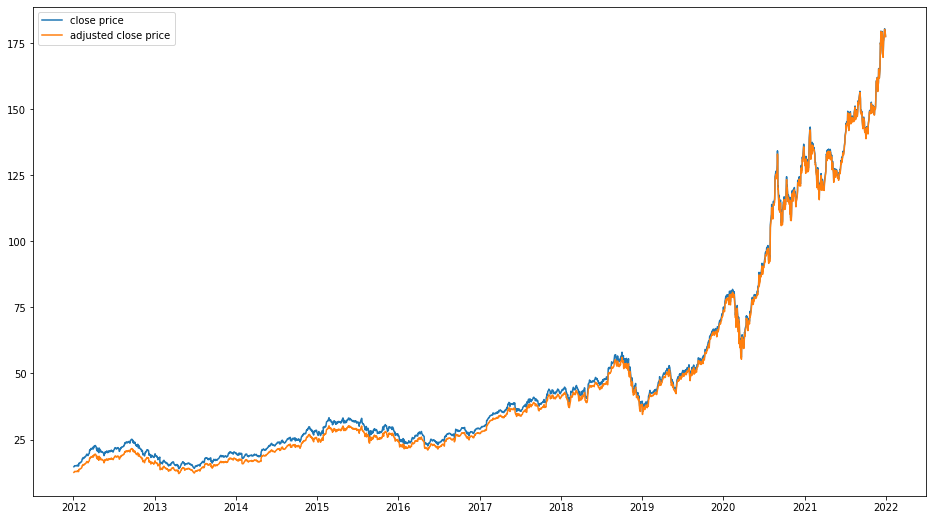

In [12]:
# close_price.plot(figsize=(16,9), title="AAPL Stock Price 2012-2022")

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_price, label='close price')
ax.plot(adj_close_price, label='adjusted close price')

ax.legend()


### Simple 200 day MA

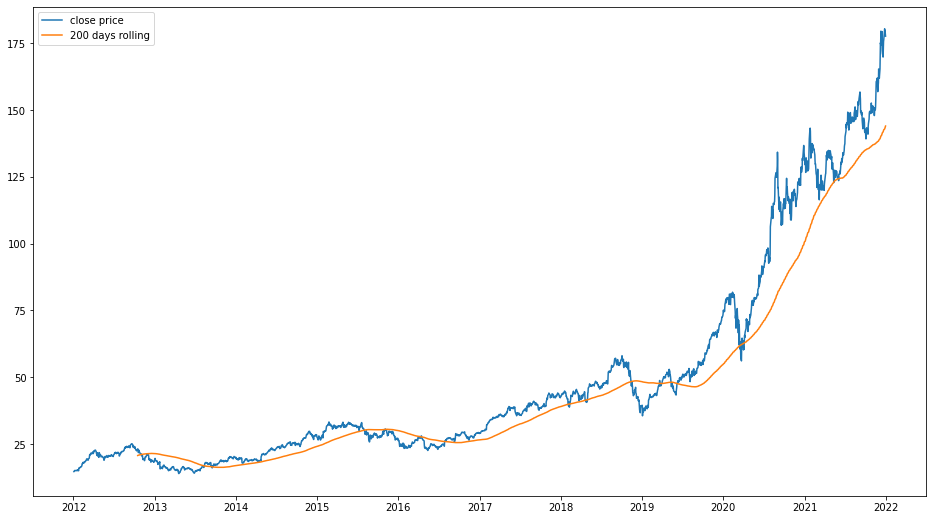

In [15]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_price, label='close price')

ma_long_close = close_price.rolling(window=200).mean()
ax.plot(ma_long_close, label='200 days rolling')
ax.legend()

### 200 day WMA
https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9

### 200 day EMA

## Comparison of AAPL, MSFT, NVDA, ADBE, ORCL

In [20]:
tickers5 = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'ORCL']

start_date = '2012-01-01'
end_date = '2022-01-01'

panel_data5 = data.DataReader(tickers5, 'yahoo', start_date, end_date)

In [21]:
panel_data5.head()

Attributes  Adj Close                                                 Close  \
Symbols          AAPL       MSFT      NVDA       ADBE       ORCL       AAPL   
Date                                                                          
2012-01-03  12.575918  21.623133  3.224322  28.570000  22.303888  14.686786   
2012-01-04  12.643498  22.132010  3.261067  28.280001  22.433264  14.765714   
2012-01-05  12.783864  22.358173  3.378190  28.480000  22.933512  14.929643   
2012-01-06  12.917508  22.705503  3.339149  28.719999  23.226763  15.085714   
2012-01-09  12.897017  22.406641  3.339149  28.530001  23.365063  15.061786   

Attributes                                           ...       Open  \
Symbols          MSFT    NVDA       ADBE       ORCL  ...       AAPL   
Date                                                 ...              
2012-01-03  26.770000  3.5100  28.570000  25.860001  ...  14.621429   
2012-01-04  27.400000  3.5500  28.280001  26.010000  ...  14.642857   
2012-01-05  27.680000  3.6775  28.480000  26.590000  ...  14.819643   
2012-01-06  28.110001  3.6350  28.719999  26.930000  ...  14.991786   
2012-01-09  27.740000  3.6350  28.530001  27.030001  ...  15.196429   

Attributes                                                Volume              \
Symbols          MSFT    NVDA       ADBE       ORCL         AAPL        MSFT   
Date                                                                           
2012-01-03  26.549999  3.5750  28.700001  26.330000  302220800.0  64731500.0   
2012-01-04  26.820000  3.5125  28.500000  25.950001  260022000.0  80516100.0   
2012-01-05  27.379999  3.5325  28.070000  26.010000  271269600.0  56081400.0   
2012-01-06  27.530001  3.6750  28.370001  26.670000  318292800.0  99455500.0   
2012-01-09  28.049999  3.6375  28.760000  26.900000  394024400.0  59706800.0   

Attributes                                     
Symbols           NVDA       ADBE        ORCL  
Date                                           
2012-01-03  46804400.0  4495100.0  37911800.0  
2012-01-04  34737200.0  3852400.0  45418500.0  
2012-01-05  56354800.0  2999500.0  50873400.0  
2012-01-06  53325200.0  5781700.0  55685000.0  
2012-01-09  50824400.0  3514700.0  38481100.0  

[5 rows x 30 columns]

In [45]:
panel_data5['Adj Close'].isnull().sum()

Symbols
AAPL    0
MSFT    0
NVDA    0
ADBE    0
ORCL    0
dtype: int64

In [ ]:
# panel_data5.to_csv('tech_big_cap.csv')

### Absolute open prices

Symbols          AAPL       MSFT   NVDA       ADBE   ORCL
Date                                                     
2012-01-03  14.621429  26.549999  3.575  28.700001  26.33
Symbols           AAPL       MSFT       NVDA   ADBE       ORCL
Date                                                          
2021-12-31  178.089996  338.51001  296.73999  570.0  88.050003


<AxesSubplot:xlabel='Date'>

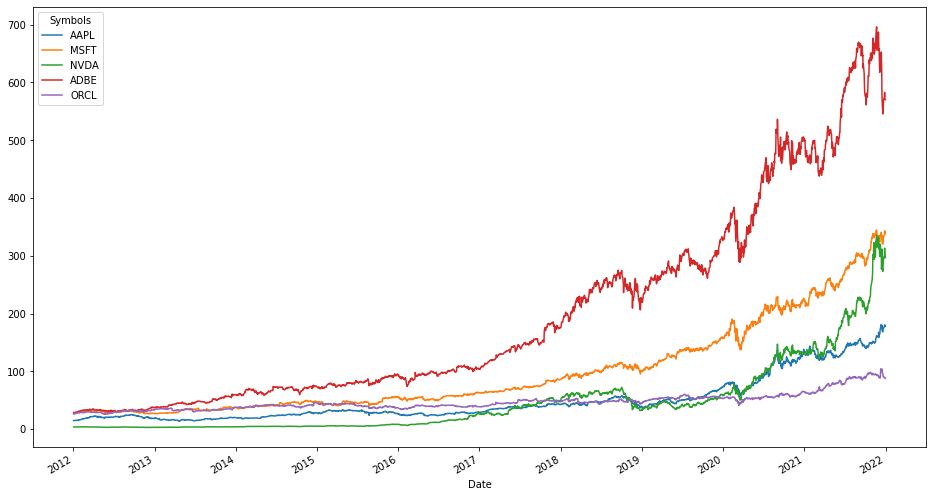

In [23]:
panel_data5_open = panel_data5['Open']
print(panel_data5_open.head(1))
print(panel_data5_open.tail(1))

panel_data5_open.plot(figsize=(16,9))

### Understand how stocks fluctuate over time

Symbols            AAPL        MSFT        NVDA       ADBE        ORCL
Date                                                                  
2012-01-03  302220800.0  64731500.0  46804400.0  4495100.0  37911800.0
Symbols           AAPL        MSFT        NVDA       ADBE       ORCL
Date                                                                
2021-12-31  64062300.0  18000800.0  26653000.0  1581400.0  5908200.0


<AxesSubplot:xlabel='Date'>

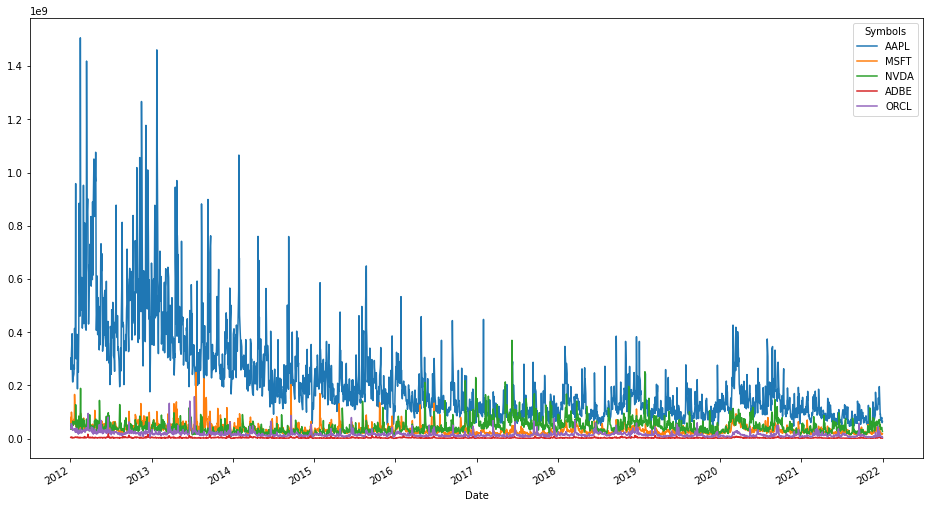

In [24]:
panel_data5_vol = panel_data5['Volume']
print(panel_data5_vol.head(1))
print(panel_data5_vol.tail(1))

panel_data5_vol.plot(figsize=(16,9))

# shows that stocks of AAPL are traded the most out of the 5 IT stocks

### Market Capitalisation

Symbols             AAPL          MSFT          NVDA          ADBE  \
Date                                                                 
2012-01-03  4.418900e+09  1.718621e+09  1.673257e+08  1.290094e+08   

Symbols             ORCL  
Date                      
2012-01-03  9.982177e+08  
Symbols             AAPL          MSFT          NVDA         ADBE  \
Date                                                                
2021-12-31  1.140885e+10  6.093451e+09  7.909011e+09  901398000.0   

Symbols             ORCL  
Date                      
2021-12-31  5.202170e+08  


<AxesSubplot:xlabel='Date'>

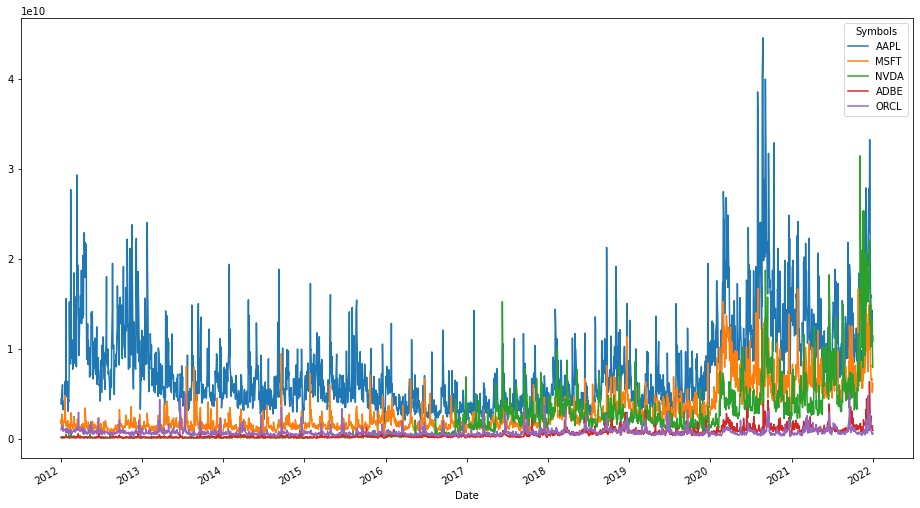

In [25]:
panel_data5_market_cap = panel_data5['Open'] * panel_data5['Volume']
print(panel_data5_market_cap.head(1))
print(panel_data5_market_cap.tail(1))

panel_data5_market_cap.plot(figsize=(16,9))

# AAPL trades on the higher side

### Scattered plot matrix

array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>,
        <AxesSubplot:xlabel='NVDA', ylabel='AAPL'>,
        <AxesSubplot:xlabel='ADBE', ylabel='AAPL'>,
        <AxesSubplot:xlabel='ORCL', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>,
        <AxesSubplot:xlabel='MSFT', ylabel='MSFT'>,
        <AxesSubplot:xlabel='NVDA', ylabel='MSFT'>,
        <AxesSubplot:xlabel='ADBE', ylabel='MSFT'>,
        <AxesSubplot:xlabel='ORCL', ylabel='MSFT'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='NVDA'>,
        <AxesSubplot:xlabel='MSFT', ylabel='NVDA'>,
        <AxesSubplot:xlabel='NVDA', ylabel='NVDA'>,
        <AxesSubplot:xlabel='ADBE', ylabel='NVDA'>,
        <AxesSubplot:xlabel='ORCL', ylabel='NVDA'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='ADBE'>,
        <AxesSubplot:xlabel='MSFT', ylabel='ADBE'>,
        <AxesSubplot:xlabel='NVDA', ylabel='ADBE'>,
        <AxesSubplot:xlabel='ADBE', ylabel='ADBE'>,
        <

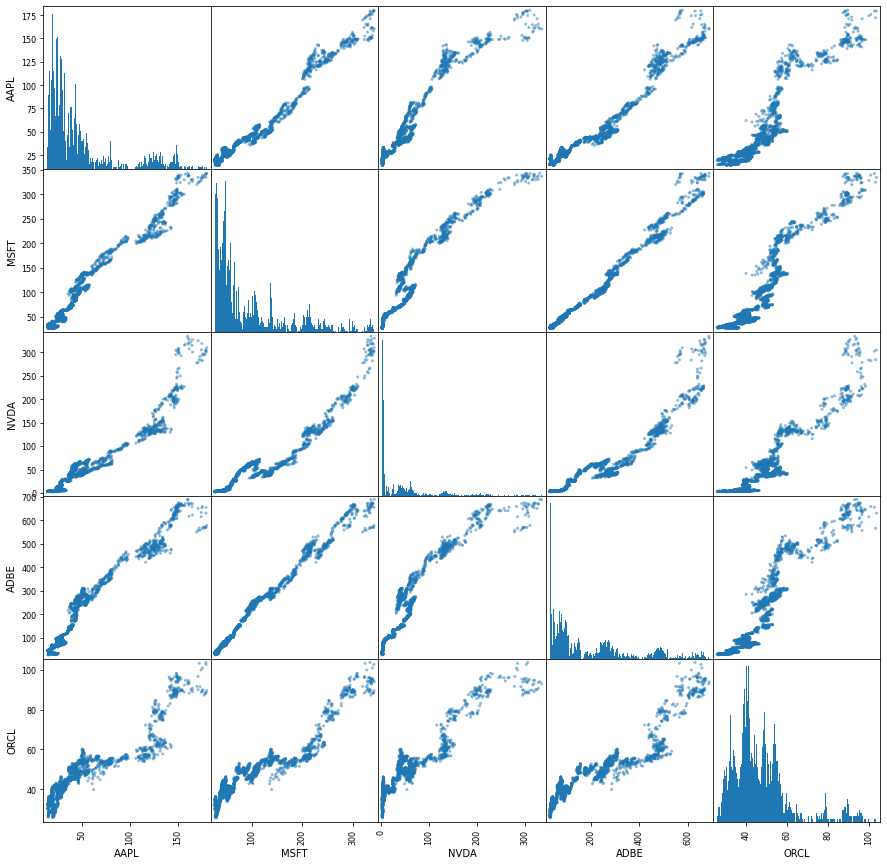

In [41]:
data = panel_data5['Close']
data.columns = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'ORCL']
scatter_matrix(data, figsize = (15,15), hist_kwds= {'bins':250})

### Correlation of each stock against the rest

In [57]:
close_return_series = (panel_data5['Close'].pct_change()+1).cumprod()-1
correlation = close_return_series.corr()
correlation

Symbols,AAPL,MSFT,NVDA,ADBE,ORCL
Symbols,,,,,
AAPL,1.000000,0.982159,0.961499,0.970963,0.923659
MSFT,0.982159,1.000000,0.957500,0.991850,0.943470
NVDA,0.961499,0.957500,1.000000,0.942453,0.932931
ADBE,0.970963,0.991850,0.942453,1.000000,0.934590
ORCL,0.923659,0.943470,0.932931,0.934590,1.000000


### Absolute adj close price

Symbols          AAPL       MSFT      NVDA   ADBE       ORCL
Date                                                        
2012-01-03  12.575918  21.623133  3.224322  28.57  22.303888
Symbols           AAPL        MSFT        NVDA        ADBE       ORCL
Date                                                                 
2021-12-31  177.344055  335.626038  294.109985  567.059998  86.887222


<AxesSubplot:xlabel='Date'>

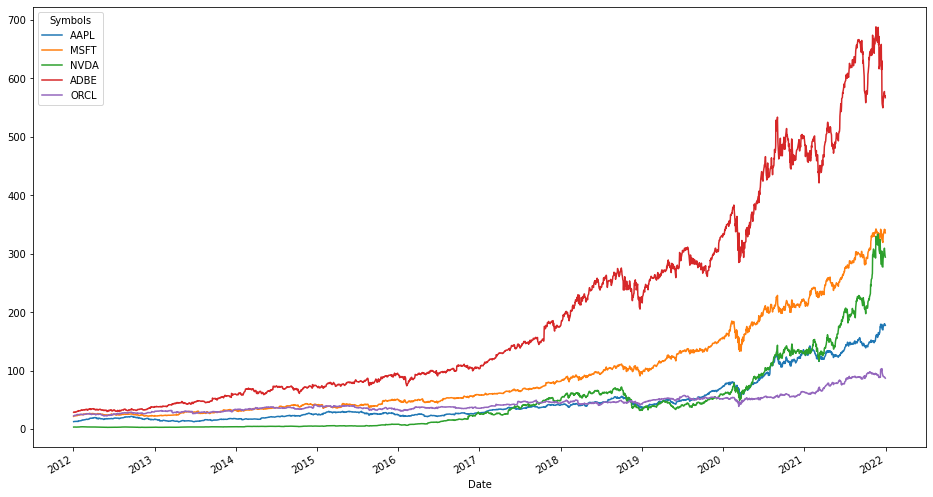

In [26]:
panel_data5_adjclose = panel_data5['Adj Close']
print (panel_data5_adjclose.head(1))
print (panel_data5_adjclose.tail(1))

panel_data5_adjclose.plot(figsize=(16,9))

### Adj close return series

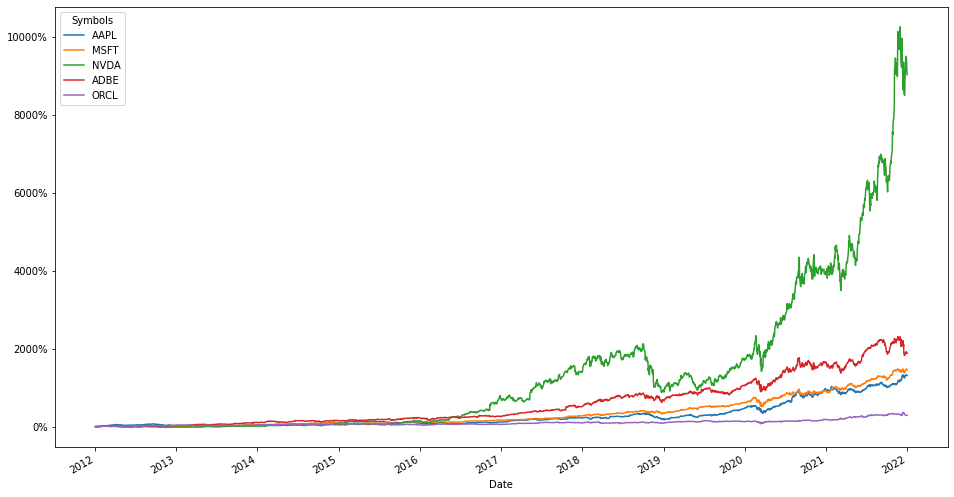

In [27]:
return_series = (1 + panel_data5_adjclose.pct_change()).cumprod() - 1

ax1 = return_series.plot(figsize=(16,9))
#This sets the axis to percentage scale
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [29]:
# last row in return series = total return for that period

print("Total 10-year percentage return for each stock\n")
print((return_series.tail(1)*100).round(2))

Total 10-year percentage return for each stock

Symbols        AAPL     MSFT     NVDA     ADBE    ORCL
Date                                                  
2021-12-31  1310.19  1452.16  9021.61  1884.81  289.56


### Annualized returns

In [40]:
annualized_return = ((1+return_series.tail(1)**(1/10))-1)
print(annualized_return * 100)

Symbols           AAPL        MSFT        NVDA        ADBE       ORCL
Date                                                                 
2021-12-31  129.340148  130.677707  156.865843  134.130252  111.21772


### 10 year relative Performance 
compare against benchmark

In [ ]:
# (annualized_return - annualized_return.iloc[0,5])*100

### Close return series

In [46]:
close_return_series = (1 + panel_data5["Close"].pct_change()).cumprod() - 1
close_return_series.head()

Symbols,AAPL,MSFT,NVDA,ADBE,ORCL
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.023534,0.011396,-0.01015,0.005800
2012-01-05,0.016536,0.033993,0.047721,-0.00315,0.028229
2012-01-06,0.027162,0.050056,0.035613,0.00525,0.041377
2012-01-09,0.025533,0.036235,0.035613,-0.00140,0.045244


<AxesSubplot:xlabel='Date'>

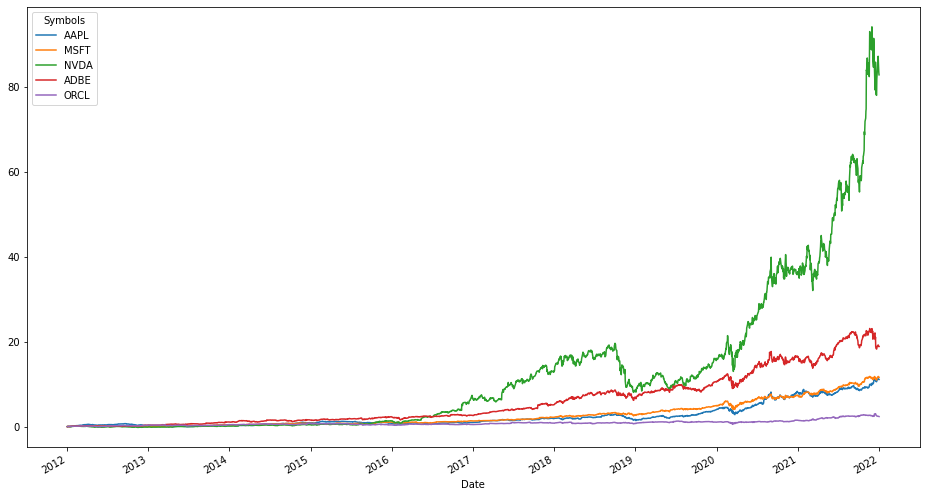

In [47]:
close_return_series.plot(figsize=(16,9))

### Correlation of close return series to benchmark

In [44]:
# corr = close_return_series.corr()
# print(corr)

### AAPL vs benchmark

In [ ]:
# plt.scatter(close_return_series.iloc[:,[0]],close_return_series.iloc[:,[5]])
# plt.xlabel(ret_series_close_1y.columns[0])
# plt.ylabel(ret_series_close_1y.columns[5])

In [ ]:
# repeat for other stocks

### Percentage increase in stock value

In [37]:
#Volatility
# tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
# infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
# wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
# tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
# infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
# wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
# plt.legend()


# panel_data5_returns = (panel_data5['Close']/panel_data5['Close'].shift(1))-1
# print(panel_data5_vol.head(1))
# print(panel_data5_vol.tail(1))

# panel_data5_returns.plot(figsize=(16,9))
# % increase in stock price histogram for TCS is the widest = stock of TCS is most volatile

## Volatility

### 10 year volatility on 20 day window

C:\Users\User\AppData\Local\Temp/ipykernel_51912/3765562989.py:2: RuntimeWarning: divide by zero encountered in log
  cchv = np.sqrt(252) * pd.DataFrame.rolling(np.log(close_10y / close_10y.shift(1)),window=20).std()
C:\Users\User\AppData\Local\Temp/ipykernel_51912/3765562989.py:2: RuntimeWarning: invalid value encountered in log
  cchv = np.sqrt(252) * pd.DataFrame.rolling(np.log(close_10y / close_10y.shift(1)),window=20).std()


Text(0.5, 1.0, 'Historical Volatility')

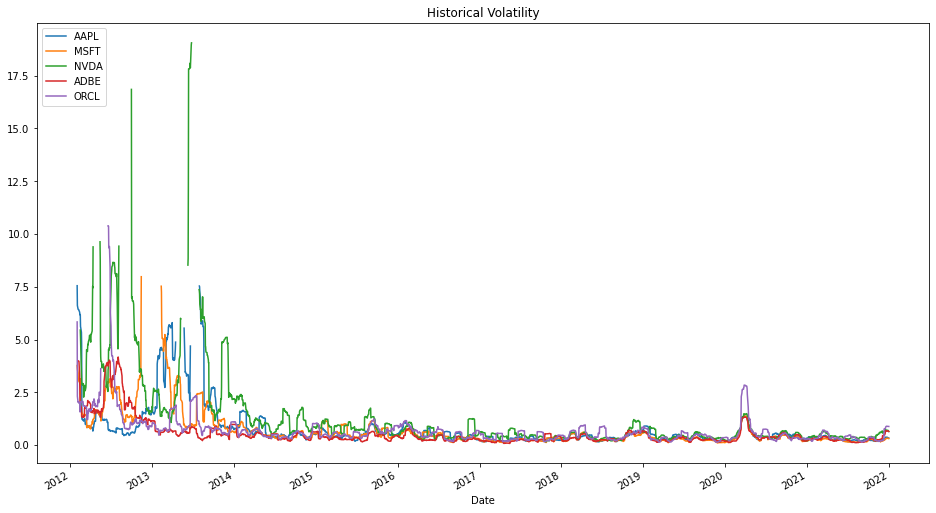

In [48]:
close_10y = close_return_series.loc['2012-01-01':'2022-01-01']
cchv = np.sqrt(252) * pd.DataFrame.rolling(np.log(close_10y / close_10y.shift(1)),window=20).std()
cchv.plot(figsize=(16,9))
plt.legend(loc='upper left')
plt.title('Historical Volatility')

## Distribution

In [50]:
log_returns = np.log(close_return_series / close_return_series.shift(1))
mean = log_returns.mean()
median = log_returns.median()
std = log_returns.std()

print("Mean values---\n", mean)
print("Median values---\n", median)
print("Std deviation---\n", std)

Mean values---
 Symbols
AAPL    0.001929
MSFT    0.002811
NVDA         NaN
ADBE    0.002222
ORCL    0.002383
dtype: float64
Median values---
 Symbols
AAPL    0.001621
MSFT    0.001438
NVDA    0.002949
ADBE    0.002227
ORCL    0.002072
dtype: float64
Std deviation---
 Symbols
AAPL    0.109936
MSFT    0.151467
NVDA         NaN
ADBE    0.059222
ORCL    0.085037
dtype: float64


C:\Users\User\AppData\Local\Temp/ipykernel_51912/3715033163.py:1: RuntimeWarning: divide by zero encountered in log
  log_returns = np.log(close_return_series / close_return_series.shift(1))
C:\Users\User\AppData\Local\Temp/ipykernel_51912/3715033163.py:1: RuntimeWarning: invalid value encountered in log
  log_returns = np.log(close_return_series / close_return_series.shift(1))


In [55]:
# x=np.linspace(mean['AAPL']-3*std['AAPL'], mean['AAPL'] + 3*std['AAPL'], 100)
# plt.figure(figsize=(16,5))
# plt.hist(log_returns['AAPL'], bins=20, edgecolor='black');
# plt.plot(x, norm.pdf(x,mean['AAPL'],std['AAPL']),color="r")
# plt.title('AAPL Histogram')
# plt.show()

# x=np.linspace(mean['MSFT']-3*std['MSFT'], mean['MSFT'] + 3*std['MSFT'], 100)
# plt.figure(figsize=(16,5))
# plt.hist(log_returns['MSFT'], bins=20, edgecolor='black');
# plt.plot(x, norm.pdf(x,mean['MSFT'],std['MSFT']),color="r")
# plt.title('MSFT Histogram')
# plt.show()

# x=np.linspace(mean['NVDA']-3*std['NVDA'], mean['NVDA'] + 3*std['NVDA'], 100)
# plt.figure(figsize=(16,5))
# plt.hist(log_returns['NVDA'], bins=20, edgecolor='black');
# plt.plot(x, norm.pdf(x,mean['NVDA'],std['NVDA']),color="r")
# plt.title('NVDA Histogram')
# plt.show()

# x=np.linspace(mean['ADBE']-3*std['ADBE'], mean['ADBE'] + 3*std['ADBE'], 100)
# plt.figure(figsize=(16,5))
# plt.hist(log_returns['ADBE'], bins=20, edgecolor='black');
# plt.plot(x, norm.pdf(x,mean['ADBE'],std['ADBE']),color="r")
# plt.title('ADBE Histogram')
# plt.show()

# x=np.linspace(mean['ORCL']-3*std['ORCL'], mean['ORCL'] + 3*std['ORCL'], 100)
# plt.figure(figsize=(16,5))
# plt.hist(log_returns['ORCL'], bins=20, edgecolor='black');
# plt.plot(x, norm.pdf(x,mean['ORCL'],std['ORCL']),color="r")
# plt.title('ORCL Histogram')
# plt.show()

## QQ Plots

In [ ]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,10))
# sm.qqplot(log_returns['SPY'], line = 's', ax=ax1)
# sm.qqplot(log_returns['VGT'], line = 's', ax=ax2)
# sm.qqplot(log_returns['SPLV'], line = 's', ax=ax3)

### Skew kurtosis

In [ ]:
#write your code here
# SPY
print("Kurtosis")
print(log_returns['SPY'].kurtosis())
print("Skewness")
print(log_returns['SPY'].skew())
print('\n')
# VGT
print("Kurtosis")
print(log_returns['VGT'].kurtosis())
print("Skewness")
print(log_returns['VGT'].skew())
print('\n')
# SPLV
print("Kurtosis")
print(log_returns['SPLV'].kurtosis())
print("Skewness")
print(log_returns['SPLV'].skew())

## Sharpe ratio